### Find most similar compounds within Enamine REAL using Ftrees

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
from pathlib import Path
import os
import sys
from distutils.spawn import find_executable
import subprocess

import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from IPython.core.display import HTML

<IPython.core.display.Javascript object>

### Define input path for binary and library
Define constant that points to the data/ folder using absolute path in running computer (working dir indepedent).
* adapted from [ftrees ipynb](../code/ftrees/)

In [3]:
DATADIR = Path(_dh[0]) / "result_data"
print(DATADIR)

C:\Users\andre\Desktop\Arbeit_Charite\GitHub\covid19-SBapproach\fragment_growing_pipeline\result_data


<IPython.core.display.Javascript object>

In [4]:
# FTrees executable
# Replace with your absolute path if location is not standard
if sys.platform == "windows" or sys.platform == "win32":
    path_to_binary = (
        rf"{os.environ['LOCALAPPDATA']}\Programs\BioSolveIT\FTrees-6.0\FTrees.exe"
    )
else:
    path_to_binary = find_executable("Ftrees")
# fragment space
if not path_to_binary or not os.path.isfile(path_to_binary):
    raise ValueError("FTrees program cannot be found")
fspace = "REALspace_2019-12.space"
library = Path(_dh[0]).parent / "data" / f"{fspace}"
print(path_to_binary)
print(library)

C:\Users\andre\AppData\Local\Programs\BioSolveIT\FTrees-6.0\FTrees.exe
C:\Users\andre\Desktop\Arbeit_Charite\GitHub\covid19-SBapproach\data\REALspace_2019-12.space


<IPython.core.display.Javascript object>

### Set command line options

In [5]:
# Maximum number of top-ranking result molecules [1 to 1000000].
max_nof_results = 100
# Similarity threshold below which molecules are discarded [0.0 to 1.0].
min_sim_thresh = 0.8
# Desired target similarity to the query molecule [0.5 to 1.0]. Note: Must be >= '--minSimilarityThreshold'
target_sim = 1
# Required diversity between any two compounds in a solution set [0.9 to 1.0].
total_div = 0.95
# Generates 3d coordinates in case of SDF output files. 0 = off
gen_3d_output = 1

<IPython.core.display.Javascript object>

### Read top 5 molecules

In [6]:
# get molecule file
molecules_sdf = str(DATADIR / "x0967_seesar_inspirations_top5.sdf")
# Output base files (suffixes are required). Only '.sdf' and '.csv' are supported.
outfile_name = "x0967_top5_inspirations_out"

<IPython.core.display.Javascript object>

,BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM],BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_UPPER_BOUNDARY [nM],"BIOSOLVEIT.HYDE_LIGAND_EFFICIENCY range: ++, +, 0, -, --","BIOSOLVEIT.HYDE_LIGAND_LIPOPHILIC_EFFICIENCY range: ++, +, 0, -, --","BIOSOLVEIT.INTER_CLASH range: red, yellow, green","BIOSOLVEIT.INTRA_CLASH range: red, yellow, green",BIOSOLVEIT.LOGP,BIOSOLVEIT.MOLECULAR WEIGHT,BIOSOLVEIT.MOLECULE_CHECKSUM,"BIOSOLVEIT.TORSION_QUALITY range: red, yellow, green, not rotatable",BIOSOLVEIT.TPSA,ID,ROMol
0,16.067254,1596.376710,0,0,green,green,2.5244,332.441,LTM4Ljc4ODY7MS42MTYxOQ==,green,78.43,LIG_A_1101_CCC[C@H]([R*])C1CCC1_2,
1,38.968780,3871.778648,+,0,green,green,2.1501,295.4,LTM2LjU5MjM7MS44Mjk2MQ==,yellow,66.4,LIG_A_1101_CC(C)SC[R*]_1,
2,52.938810,5259.783805,+,0,green,green,1.3557,278.35,LTM1LjgzMjg7MS43OTE2NA==,yellow,78.43,LIG_A_1101_CCCC[R*]_2,
3,73.227225,7275.557743,0,+,green,green,-0.1737,334.437,LTM1LjAyODU7MS40NTk1Mg==,green,82.87,LIG_A_1101_C[NH+](C)[C@H]([R*])C1CCC1_2,
4,93.123469,9252.367271,0,-,green,yellow,2.541,376.494,LTM0LjQzMjc7MS4yNzUyOA==,red,87.66,LIG_A_1101_CC(C)CC[C@]1([R*])CCCOC1_2,
5,189.260159,18804.115768,0,0,green,yellow,0.9114,339.188,LTMyLjY3NDY7MS42MzM3Mw==,green,78.43,LIG_A_1101_2_02,

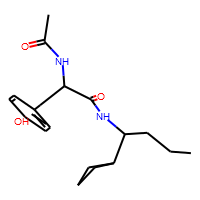
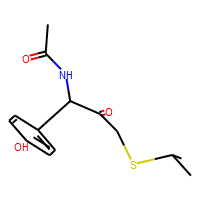
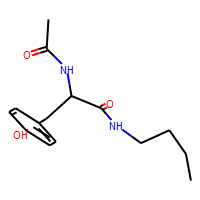
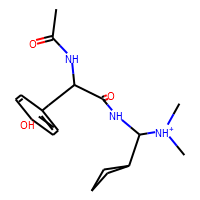
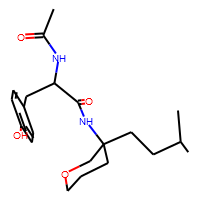
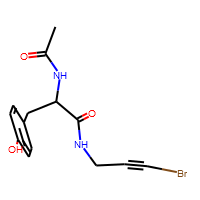

<IPython.core.display.Javascript object>

In [7]:
df_tmp = PandasTools.LoadSDF(molecules_sdf)
display(HTML(df_tmp.to_html()))

### Prepare system call

In [8]:
sys_call = [
    path_to_binary,
    "--input",
    molecules_sdf,
    "--searchFiles",
    library,
    "--maxNofResults",
    max_nof_results,
    "--outputFiles",
    DATADIR / f"{outfile_name}.sdf",
    "--minSimilarityThreshold",
    min_sim_thresh,
    "--targetSimilarity",
    target_sim,
    "--totalDiversity",
    total_div,
    "--gen3dOutput",
    gen_3d_output,
]
print(*sys_call)

C:\Users\andre\AppData\Local\Programs\BioSolveIT\FTrees-6.0\FTrees.exe --input C:\Users\andre\Desktop\Arbeit_Charite\GitHub\covid19-SBapproach\fragment_growing_pipeline\result_data\x0967_seesar_inspirations_top5.sdf --searchFiles C:\Users\andre\Desktop\Arbeit_Charite\GitHub\covid19-SBapproach\data\REALspace_2019-12.space --maxNofResults 100 --outputFiles C:\Users\andre\Desktop\Arbeit_Charite\GitHub\covid19-SBapproach\fragment_growing_pipeline\result_data\x0967_top5_inspirations_out.sdf --minSimilarityThreshold 0.8 --targetSimilarity 1 --totalDiversity 0.95 --gen3dOutput 1


<IPython.core.display.Javascript object>

In [9]:
# run
out = subprocess.check_output([str(x) for x in sys_call])
out

b'\r\nQueryMolecule: LIG_A_1101_CCC[C@H]([R*])C1CCC1_2 (1) \tnofMatches: 100\r\n   matching molecule: s_22____6107996____17513450 \t   source: REALspace_2019-12 \t   similarity: 1\r\n   matching molecule: s_22____307590____17513450 \t   source: REALspace_2019-12 \t   similarity: 0.988319\r\n   matching molecule: s_22____15101146____17513450 \t   source: REALspace_2019-12 \t   similarity: 0.977979\r\n   matching molecule: s_22____13441554____17513450 \t   source: REALspace_2019-12 \t   similarity: 0.974584\r\n   matching molecule: s_22____10431726____17513450 \t   source: REALspace_2019-12 \t   similarity: 0.964162\r\n   matching molecule: s_22____11950036____107332 \t   source: REALspace_2019-12 \t   similarity: 0.962781\r\n   matching molecule: s_22____505534____17512240 \t   source: REALspace_2019-12 \t   similarity: 0.962495\r\n   matching molecule: s_22____17608280____16887748 \t   source: REALspace_2019-12 \t   similarity: 0.960826\r\n   matching molecule: s_240690a____16508828___

<IPython.core.display.Javascript object>

### Append the result from the the individual result files

In [21]:
from os import listdir

# list data
all_files = [f for f in listdir(DATADIR)]
# print(all_files)
# collect frames
frames = []

for file in all_files:
    if file.startswith(outfile_name):
        print(file)
        df = PandasTools.LoadSDF(str(DATADIR / file))
        frames.append(df)
result = pd.concat(frames, ignore_index=True, sort=False)
result.shape

x0967_top5_inspirations_out_1.sdf
x0967_top5_inspirations_out_2.sdf
x0967_top5_inspirations_out_3.sdf
x0967_top5_inspirations_out_4.sdf
x0967_top5_inspirations_out_5.sdf
x0967_top5_inspirations_out_6_LIG_A_1101_2_02.sdf


(600, 16)

<IPython.core.display.Javascript object>

In [28]:
result.tail()

,result-rank,similarity,query-name,query-smiles,source,similarity-descriptor,similarity-descriptor-smiles,reaction-name,reagent1-name,reagent1-smiles,reagent2-name,reagent2-smiles,ID,ROMol,reagent3-name,reagent3-smiles
595,96,0.926,LIG_A_1101_2_02,BrC#CCNC(=O)[C@@H](NC(=O)C)Cc1ccc(O)cc1,REALspace_2019-12,1.000;0.968;0.968;0.934;1.000;0.995;0.953;0.85...,c1ccccc1;FC(F)F;FC(F)F;C;N;C=O;N(C)C;CO;CO;C;N...,s_273458b,11769690,[R1*]C(=O)NC(C(F)(F)F)CN,11096048,[R1*]N(Cc1c(OCC)cccc1)CC(O)C,s_273458b____11769690____11096048,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",NaN,NaN
596,97,0.925,LIG_A_1101_2_02,BrC#CCNC(=O)[C@@H](NC(=O)C)Cc1ccc(O)cc1,REALspace_2019-12,0.825;0.986;0.986;0.999;1.000;0.999;0.825;1.00...,C1=CC=CNC1=O;BrC(F)F;BrC(F)F;C;N;C=O;C1=CC=CNC...,s_22,10176574,[R1*]NCC(Br)(F)F,12102936,[R1*]C(=O)c1c(O)ncc(NC(=O)C)c1,s_22____10176574____12102936,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",NaN,NaN
597,98,0.925,LIG_A_1101_2_02,BrC#CCNC(=O)[C@@H](NC(=O)C)Cc1ccc(O)cc1,REALspace_2019-12,1.000;0.969;0.969;0.523;0.523;1.000;1.000;1.00...,c1ccccc1;C(F)(F)F;C(F)(F)F;SC;SC;C=O;NC;NC;C(=...,s_22,12206138,[R1*]NC(C(=O)OC)Cc1c(O)cccc1,651936,[R1*]C(=O)C(SC(F)(F)F)C,s_22____12206138____651936,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",NaN,NaN
598,99,0.925,LIG_A_1101_2_02,BrC#CCNC(=O)[C@@H](NC(=O)C)Cc1ccc(O)cc1,REALspace_2019-12,0.960;0.968;0.968;0.999;1.000;0.995;0.952;0.95...,c1ccccc1;FC(F)F;FC(F)F;C;N;C=O;NC;NC;;;CC;;O,s_487a,4915466,[R1*]NCC(O)(c1ccccc1)C,1735730,[R1*]C(=O)NCC(F)(F)F,s_487a____4915466____1735730,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",NaN,NaN
599,100,0.925,LIG_A_1101_2_02,BrC#CCNC(=O)[C@@H](NC(=O)C)Cc1ccc(O)cc1,REALspace_2019-12,0.965;0.990;0.988;0.988;1.000;0.995;0.824;0.82...,Fc1ccccc1;C(F)(F)F;CC;CC;N;C=O;CCN;CCN;C(=O)N;...,s_2430a,11944322,[R1*]C(=O)NC(C(F)(F)F)(C)C,11566480,[R1*]NCC(C(=O)NC)Cc1cc(F)c(OC)cc1,s_2430a____11944322____11566480,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",NaN,NaN


<IPython.core.display.Javascript object>

In [29]:
fname = str(DATADIR / f"{outfile_name}_enamineREAL_combined.sdf")
PandasTools.WriteSDF(result, fname)

<IPython.core.display.Javascript object>